In [1]:
import pandas as pd
ri = pd.read_csv('police.csv')
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri.is_arrested.astype('bool')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)
ri.set_index('stop_datetime', inplace=True)

C:\Users\KASIM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [3]:
ri.is_arrested.mean()

0.03454755048024903

In [4]:
type(ri.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [6]:
ri.index.hour.unique()

Int64Index([ 1, 20, 12,  8, 17, 23,  3,  2,  4,  5, 10, 15, 14,  9,  0, 21, 22,
            13, 16, 11,  7, 19, 18,  6],
           dtype='int64', name='stop_datetime')

In [7]:
ri.index.hour.nunique()

24

In [8]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [9]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [10]:
import matplotlib.pyplot as plt

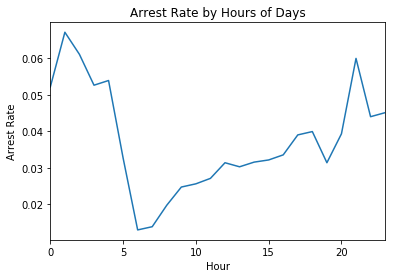

In [11]:
hourly_arrest_rate.plot()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Hours of Days')

plt.show()

In [12]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [ ]:
ri.drugs_related_stop.resample('A')

In [ ]:
ri.drugs_related_stop.resample('A').mean()

In [ ]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

In [ ]:
annual_drug_rate.plot()

plt.show()

In [ ]:
ri.columns

In [ ]:
ri.search_conducted.head()

In [ ]:
ri.search_conducted.dropna().astype('int').resample('A').mean()  #missing valuelari dusurdum ve 

In [ ]:
annual_search_rate = ri.search_conducted.dropna().astype('int').resample('A').mean() #yillik arama orani olarak kaydettik

In [ ]:
annual = pd.concat([annual_drup_rate, annual_search_rate], axis = 'columns')

In [ ]:
annual

In [ ]:
# plt.subplot(2,1,1)
# plt.subplot(2,1,2)

In [ ]:
annual.plot(subplots = True)   #pandasin plot grafigini gormekteyiz

plt.show( )